#### duration of signal using consecutive array

#### temopral features


####  Cycele determiation

#### wavelet implementation***


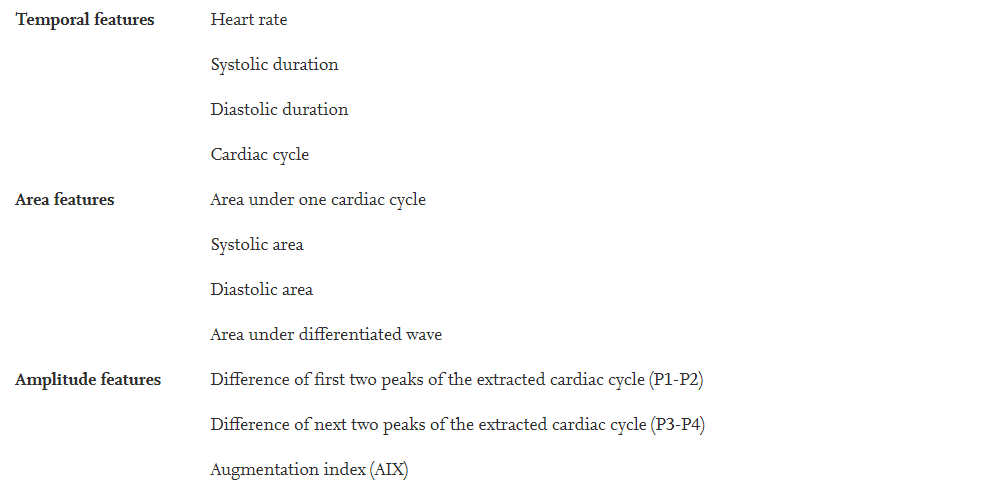

###### Calculation Of number  of Cardiac Cycle

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sympy as smp
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
from scipy import fftpack
from numpy import *

scope1 = pd.read_csv("scope_2.csv")

scope2 = pd.read_csv("scope_3.csv")
scope3 = pd.read_csv("scope_4.csv")
scope4 = pd.read_csv("scope_28.csv")
scope5 = pd.read_csv("scope_29.csv")
scope6 = pd.read_csv("scope_30.csv")


scope7 = pd.read_csv("scope_42.csv")
scope8 = pd.read_csv("scope_43.csv")
scope9 = pd.read_csv("scope_44.csv")

In [4]:
def butter(order,signal,fc):
#     fc = 250
    fs = 30000
    wn = fc/15000
    b, a = scipy.signal.butter(order,wn, "low", analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)
    return y

def derivate(signal):
    signal = np.array(signal)
#     signal =crop(signal)
    return np.diff(signal)

def sys_dys(signal,Plot = None):

    peaks = (diff(sign(diff(signal))) < 0).nonzero()[0] + 1
    sys = []
    sys_ind = []
    dys = []
    dys_ind = []
    for ele in peaks:
        a = min(signal[peaks])
        if signal[ele]>=(max(signal[peaks])-0.22):
            sys.append(signal[ele])
            sys_ind.append(ele)
        else:
            dys.append(signal[ele])
            dys_ind.append(ele)
            
    mini = (diff(sign(diff(signal))) > 0).nonzero()[0] + 1
    dic_not = []
    dic_ind = []
    base = []
    base_ind = []
    for ele in mini:
        if signal[ele]>=(max(signal[mini])-0.22):
            dic_not.append(signal[ele])
            dic_ind.append(ele)
        else:
            base.append(signal[ele])
            base_ind.append(ele)
    if Plot is True:
        plt.figure(figsize = (8,8))      
        plt.plot(   signal)
        plt.plot(sys_ind, signal[sys_ind], "x",label = "Systole")
        plt.plot(dys_ind, signal[dys_ind], "o",label = "Distole")
        plt.plot(dic_ind, signal[dic_ind], "^",label = "Dicrotic Notch")
        plt.plot(base_ind, signal[base_ind], "*",label = "Base")
        plt.legend()
    else:
        return sys,sys_ind,dys,dys_ind,dic_not,dic_ind,base,base_ind


def Systole_Duration(signal):
#     signal = crop(signal)
    sys,sys_ind,dys,dys_ind,dic_not,dic_ind,base,base_ind = sys_dys(signal,Plot = None)
    l = []
    l.append(dic_ind[0])
    for i in range(1,len(dic_ind)):
        l.append(dic_ind[i]-base_ind[i-1])
    return sum(l) 

def Distole_Duration(signal):
#     signal = crop(signal)
    sys,sys_ind,dys,dys_ind,dic_not,dic_ind,base,base_ind = sys_dys(signal,Plot = None)
    l = []
    l.append((len(signal) - 1)-(dic_ind[-1]))
    for i in range(0,len(base_ind)-1):
        l.append(base_ind[i]-dic_ind[i])
    return sum(l) 

def Cardiac_cycle(signal):
    sys,*_ = sys_dys(signal,Plot = None)
    return (f"{len(sys)*12}" ) #(x*60/5 = x*12)

def Heart_Rate(signal):
    sys,*_ = sys_dys(signal,Plot = None)
    return (f"{len(sys)*12} " ) #(x*60/5 = x*12)

def crop(signal):
    mini = (diff(sign(diff(signal))) > 0).nonzero()[0] + 1
    return  signal[mini[1]:mini[-2]]

def crop_plot(signal):
#     signal = crop(signal)
    peaks, _ = find_peaks(signal)
    mini = (diff(sign(diff(signal))) > 0).nonzero()[0] + 1
    plt.plot(signal)
    plt.plot(peaks, signal[peaks], "x")
    plt.plot(mini, signal[mini], "o")
    return (len(mini),len(peaks))



In [13]:
def area_freq_resp(signal):
    f_s = 30000
    signal = np.array(signal)
    X = fftpack.fft(signal)
    return abs(X[0])

def sys_area(signal):
#     signal = crop(signal)
    *_,dic_ind,_,base_ind = sys_dys(signal,Plot = None)
    a = []
    a.append(scipy.integrate.simps(signal[0:dic_ind[0]], x=None, dx=1, axis=-1, even='avg'))
    
    for i in range(0,len(dic_ind)-1):
        a.append(scipy.integrate.simps(signal[base_ind[i]:dic_ind[i+1]], x=None, dx=1, axis=-1, even='avg'))
        
    return sum(a)/len(a)


def dia_area(signal):
#     signal = crop(signal)
    *_,dic_ind,_,base_ind = sys_dys(signal,Plot = None)
    a = []
    a.append(scipy.integrate.simps(signal[dic_ind[-1]:], x=None, dx=1, axis=-1, even='avg'))
    
    for i in range(0,len(dic_ind)-1):
        a.append(scipy.integrate.simps(signal[dic_ind[i]:base_ind[i]], x=None, dx=1, axis=-1, even='avg'))
        
    return sum(a)/len(a)


def area_diff2(signal):    
#     signal = crop(signal)
    signal = np.diff(signal)
    f_s = 30000
    X = fftpack.fft(signal)
    freqs = fftpack.fftfreq(len(signal)) * f_s
    return abs(X[0])


# using integration

def area_diff(signal):    
    signal = np.diff(signal)
    return scipy.integrate.simps(signal, x=None, dx=1, axis=-1, even='avg')

def aui(signal):
    signal = derivate(signal)
    signal = butter(2,signal,30)
    peaks = (diff(sign(diff(signal))) < 0).nonzero()[0] + 1
    plt.plot(signal)
    plt.plot(peaks, signal[peaks], "x")

    return (signal[peaks[1]]-signal[peaks[0]])/signal[peaks[1]]



def p1p2p3p4(signal):
    signal = derivate(signal)
    signal = butter(2,signal,30)
    peak = (diff(sign(diff(signal))) < 0).nonzero()[0] + 1
    d1 = signal[peak[0]]-signal[peak[1]]
    d2 =  signal[peak[2]]-signal[peak[3]]
    return [d1,d2]

def Pow(signal):
    return sum(np.abs(signal)**2)

def max_amp_val(signal):
    return max(signal)


def rmse(signal):
    return math.sqrt ( pow(abs(signal),2).mean() )

def max_sys(signal):
    x,*_ =  sys_dys(signal,Plot = None)
    return max(x)


def max_dia(signal):
    _,_,y,*_ = sys_dys(signal,Plot = None)
    return max(y)

#### Plotting

In [6]:

# scope3.to_numpy()
xdata = np.array(scope1.iloc[:,0])
xdatanew = (xdata+0.00025)*10000
ydata =np.array(scope1.iloc[:,1])
   
filt0 = butter(2,ydata,250)
filt0 = crop(filt0)

ydata =np.array(scope2.iloc[:,1])
   
filt1 = butter(2,ydata,250)
filt1 = crop(filt1)

ydata =np.array(scope3.iloc[:,1])
   
filt2 = butter(2,ydata,250)
filt2 = crop(filt2)

ydata =np.array(scope4.iloc[:,1])
   
filt3 = butter(2,ydata,250)
filt3 = crop(filt3)

ydata =np.array(scope7.iloc[:,1])
filt4 = butter(2,ydata,250)
filt4 = crop(filt4)

In [7]:
Systole_Duration(filt1)        

918

In [8]:
Distole_Duration(filt2)

540

In [9]:
Cardiac_cycle(filt2)

'72'

-0.10011453091554476

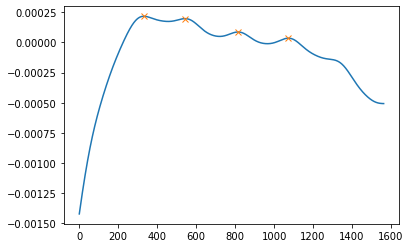

In [10]:
aui(filt2)

In [15]:
Pow(filt0)

38034.7854690168

[5.94984382e+07 1.46339852e+00 5.36948409e-01 ... 1.07830113e+00
 5.36948409e-01 1.46339852e+00]


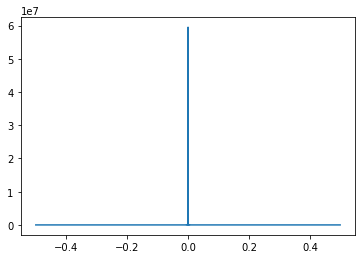

In [21]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt


ps = np.abs(np.fft.fft(filt0))**2
print(ps)
time_step = 1 / 120
freqs = np.fft.fftfreq(filt0.size)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

In [16]:
Pow(filt1)

38344.04867491469

In [14]:
Pow(filt2)

38887.86518086199

In [76]:
plt.figure(figsize = (15,15))

sys_dys(filt5,True)

NameError: name 'filt5' is not defined

<Figure size 1080x1080 with 0 Axes>

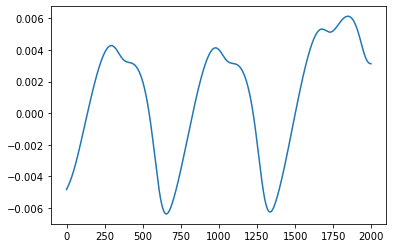

In [86]:
plt.plot(butter(1,derivate(filt4),30))

-0.5582249108556316

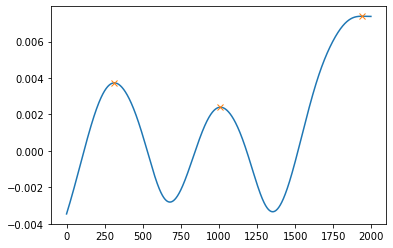

In [85]:
aui(filt4)

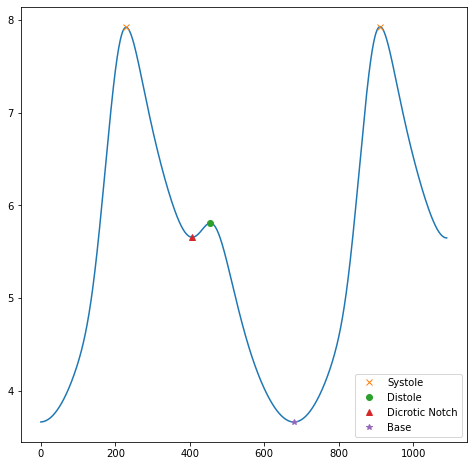

In [104]:

filt4 = filt4[::-1]
sys_dys(filt4,Plot=True)


### Area Features

In [129]:
scipy.integrate.simps(filt0, x=None, dx=1, axis=-1, even='avg')

7709.106744990234

In [130]:


area_freq_resp(filt0)

7713.523075750405

### Area Under One cardiac Cycle

,Sys_Dur,Dys_Dur,Ratio sys_dur & dys_dur,Cardiac_cycle,Heart_Rate,Systole_Area,Diastole_Area,Ratio sys_area & dys_area,Area under differentriated curve,AUI,P1-P2,P3-P4
0,918,542,1.693727,72,72,761.261295,515.047569,1.478041,0.006601,0.178872,0.000042,0.000045
1,918,540,1.700000,72,72,764.935267,515.283034,1.484495,0.010981,0.201106,0.000047,0.000045
2,915,540,1.694444,72,72,768.565329,519.618315,1.479096,0.005894,0.091004,0.000042,0.000045
3,954,524,1.820611,72,72,940.527645,586.197430,1.604455,0.001803,0.100253,0.000042,0.000045


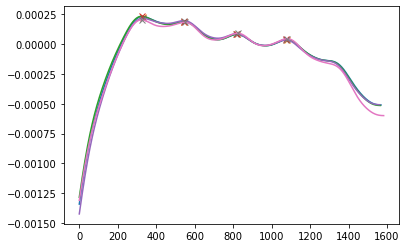

In [136]:
l = [[Systole_Duration(filt0),Distole_Duration(filt0),Systole_Duration(filt0)/Distole_Duration(filt0),Cardiac_cycle(filt0),Heart_Rate(filt0),sys_area(filt0), dia_area(filt0),sys_area(filt0)/dia_area(filt0),area_diff(filt0),aui(filt0),p1p2p3p4(filt0)[0],p1p2p3p4(filt0)[1]],
    [Systole_Duration(filt1) ,Distole_Duration(filt1),Systole_Duration(filt1)/Distole_Duration(filt1),Cardiac_cycle(filt1),Heart_Rate(filt1),sys_area(filt1), dia_area(filt1),sys_area(filt1)/dia_area(filt1),area_diff(filt1),aui(filt1),p1p2p3p4(filt1)[0],p1p2p3p4(filt0)[1]],
    [Systole_Duration(filt2) ,Distole_Duration(filt2),Systole_Duration(filt2)/Distole_Duration(filt2),Cardiac_cycle(filt2),Heart_Rate(filt2),sys_area(filt2), dia_area(filt2),sys_area(filt2)/dia_area(filt2),area_diff(filt2),aui(filt2),p1p2p3p4(filt0)[0],p1p2p3p4(filt0)[1]],
    [Systole_Duration(filt3) ,Distole_Duration(filt3),Systole_Duration(filt3)/Distole_Duration(filt3),Cardiac_cycle(filt3),Heart_Rate(filt3),sys_area(filt3), dia_area(filt3),sys_area(filt3)/dia_area(filt3),area_diff(filt3),aui(filt3),p1p2p3p4(filt0)[0],p1p2p3p4(filt0)[1]]]

df = pd.DataFrame(l, columns = ["Sys_Dur","Dys_Dur","Ratio sys_dur & dys_dur","Cardiac_cycle","Heart_Rate","Systole_Area","Diastole_Area","Ratio sys_area & dys_area","Area under differentriated curve","AUI","P1-P2","P3-P4"])
df

In [14]:
*_,_,base_ind = sys_dys(filt0,Plot = None)
x = scipy.integrate.simps(filt0[base_ind[0]:base_ind[1]], x=None, dx=1, axis=-1, even='avg')

print(f"Area under one cardiac cycle is {x}")

Area under one cardiac cycle is 1278.0116808034986


#### Systolic area

In [15]:
sys_area(filt0)

761.2612949172341

#### Diastolic area


In [16]:
 dia_area(filt0)

515.0475690007044

#### Area under differentiated signal

In [17]:
area_diff(filt0)

0.006600755914158207

In [18]:

area_diff(filt0)


0.006600755914158207

#### Augmentation index

0.9982463933996338

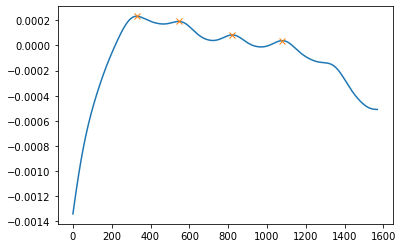

In [112]:

aui(filt0)

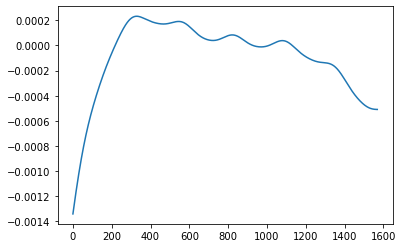

In [20]:
signal = derivate(filt0)
signal = butter(2,signal,30)
plt.plot(signal)

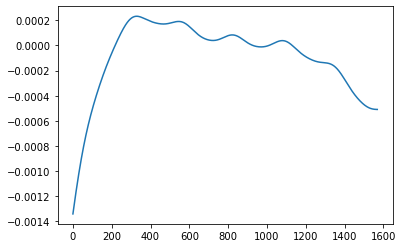

In [21]:
signal = np.diff(filt0)
signal = butter(2,signal,30)
plt.plot(signal)

#### Impelmentation Of S-Golyay Filter


In [22]:
from scipy.signal import savgol_filter
# Savitzky-Golay filter
y_filtered = savgol_filter(filt0, 99, 4)

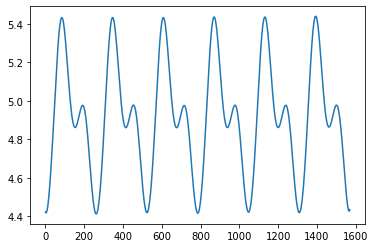

In [23]:
plt.plot(y_filtered)

In [24]:
# signal = crop(filt1)
sys,sys_ind,dys,dys_ind,dic_not,dic_ind,base,base_ind = sys_dys(filt0,Plot = None)
l = []
l.append(dic_ind[-1]-(len(signal) - 1))
for i in range(1,len(dic_ind)-1):
    l.append(base_ind[i]-dic_ind[i])

In [25]:
dic_ind

[153, 415, 676, 938, 1200, 1462]

In [26]:
base_ind

[262, 523, 785, 1047, 1309]

In [27]:
base

[4.412468023756107,
 4.41900669864316,
 4.4161366891383125,
 4.421362141354907,
 4.419238366005571]

In [28]:
dic_ind

[153, 415, 676, 938, 1200, 1462]

In [29]:
sys_ind

[85, 346, 608, 870, 1131, 1393]

In [30]:
len(signal) - 1

1568

In [31]:
(len(signal) - 1)-(dic_ind[-1])

106

In [32]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

In [33]:

import pywt
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


C:\Users\Abhishek\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


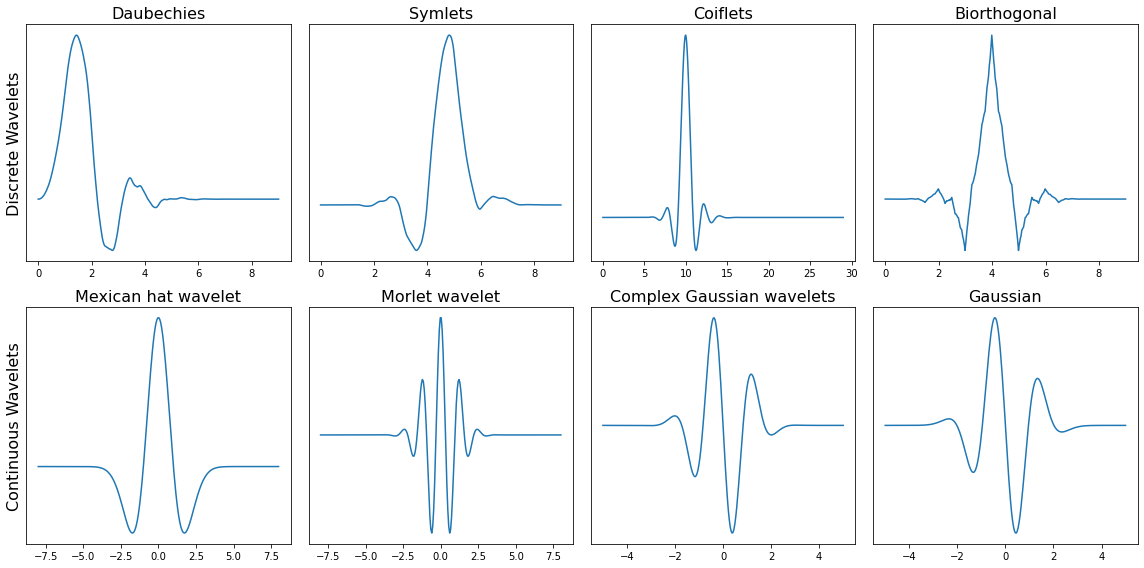

In [34]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()


In [35]:
# import pywt
# import matplotlib.pyplot as plt

# db_wavelets = pywt.wavelist('db')[:5]
# print(db_wavelets)
# ['db1', 'db2', 'db3', 'db4', 'db5']

# fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
# fig.suptitle('Daubechies family of wavelets', fontsize=16)
# for col_no, waveletname in enumerate(db_wavelets):
#     wavelet = pywt.Wavelet(waveletname)
#     no_moments = wavelet.vanishing_moments_psi
#     family_name = wavelet.family_name
#     for row_no, level in enumerate(range(1,6)):
#         wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
#         axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
#             waveletname, level, no_moments, len(x_values)), loc='left')
#         axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
#         axarr[row_no, col_no].set_yticks([])
#         axarr[row_no, col_no].set_yticklabels([])
# plt.tight_layout()
# plt.subplots_adjust(top=0.9)
# plt.show()

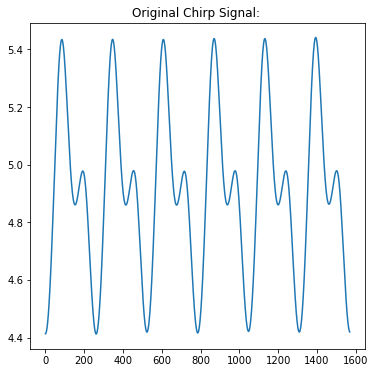

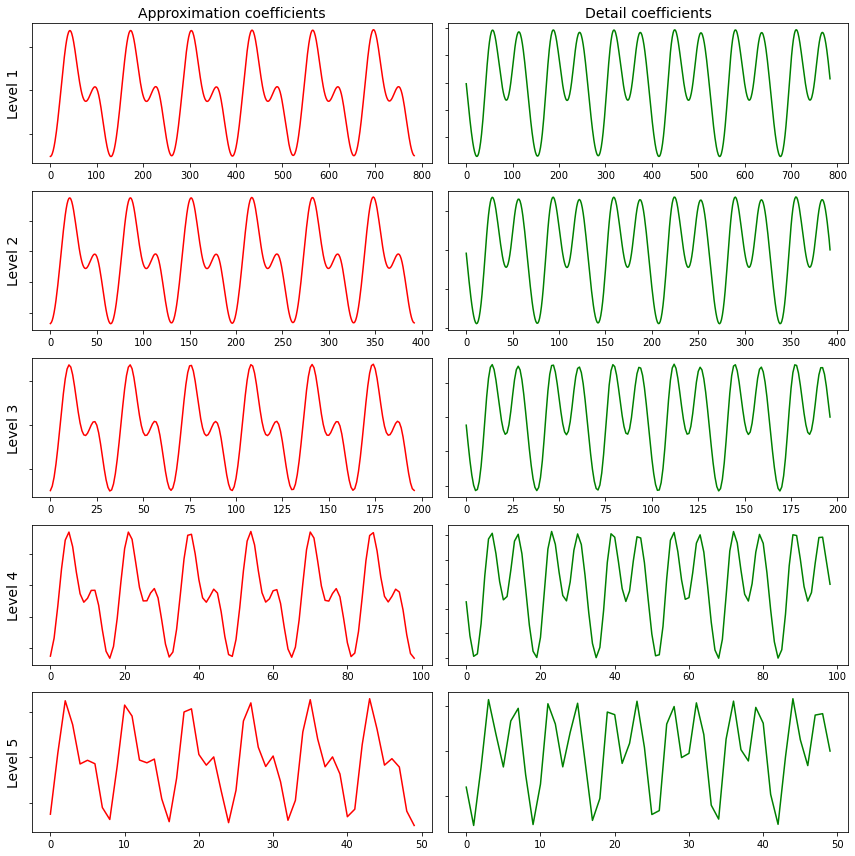

In [38]:
import pywt
# discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
x = np.linspace(0, 1, num=2048)
# chirp_signal = np.sin(250 * np.pi * x**2)
chirp_signal = filt0 
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'haar'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(12,12))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

NameError: name 'pr' is not defined

In [46]:
s = "Bob hit a ball, the hit BALL flew far after it was hit.".lower().split(" ")

In [47]:
d = {}
        
for ele in s:
    d[ele] = 1+d.get(ele,0)

In [55]:
"sadas , , , , asdsad".split(" ")

['sadas', ',', ',', ',', ',', 'asdsad']

In [66]:
a,b  =p1p2p3p4(filt0)

In [67]:
a

4.150004077900884e-05

In [68]:
b

4.5313382898443256e-05

In [81]:
def aui(signal):
    signal = derivate(signal)
    signal = butter(2,signal,30)
    peaks = (diff(sign(diff(signal))) < 0).nonzero()[0] + 1
    first_peak = signal[peaks[0]]
    signal2 = derivate(signal)
#     https://www.sciencedirect.com/science/article/pii/S2667102621001194     AIx part
    peaks1 = (diff(sign(diff(signal2))) < 0).nonzero()[0] + 1
    second_peak = signal[peaks1[0]]
    plt.plot(signal)
    plt.plot(peaks, signal[peaks], "x")
#     plt.plot(mini, signal[mini], "o")
#     peaks = sorted(peaks,reverse=True)
    return (second_peak-first_peak)/(second_peak)

-0.2811092941236423

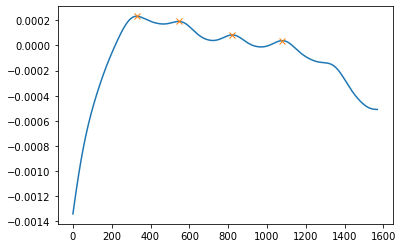

In [82]:
aui(filt0)

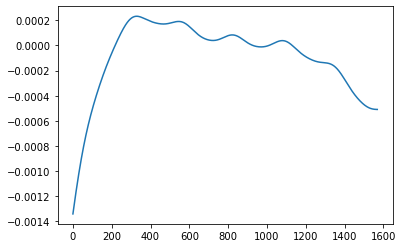

In [117]:
a = butter(2,derivate(filt0),30)
plt.plot(a)

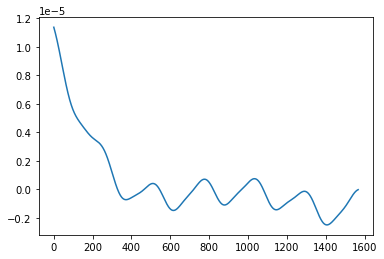

In [118]:
plt.plot(derivate(a))

RuntimeError: matplotlib does not support generators as input

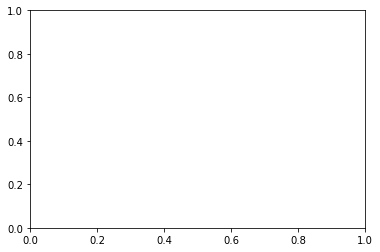

In [114]:
f = open(r"C:\Users\Abhishek\Desktop\My_Thesis_Project\Dataset\scopes\a95.csv", "w")
# # scope3.to_numpy()
# xdata = np.array(f.iloc[:,0])
# xdatanew = (xdata+0.00025)*10000
# ydata =np.array(f.iloc[:,1])
   
# filt0 = butter(2,ydata,250)
# filt0 = crop(filt0)
plt.plot(f)

In [117]:
import csv


In [120]:
f = csv.reader(open(r'C:\Users\Abhishek\Desktop\My_Thesis_Project\Dataset\scopes\a95.csv', 'r'), delimiter=",", quotechar='|')

In [121]:

xdata = np.array(f.iloc[:,0])
xdatanew = (xdata+0.00025)*10000
ydata =np.array(f.iloc[:,1])
   
filt0 = butter(2,ydata,250)
filt0 = crop(filt0)

AttributeError: '_csv.reader' object has no attribute 'iloc'